In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/mlsp-2014-mri/submission_example.csv
/kaggle/input/mlsp-2014-mri/Train.zip
/kaggle/input/mlsp-2014-mri/AdditionalInformation.zip
/kaggle/input/mlsp-2014-mri/HelperCode.zip
/kaggle/input/mlsp-2014-mri/Test.zip


In [ ]:
#Competition link

#https://www.kaggle.com/competitions/mlsp-2014-mri/leaderboard#

In [2]:
!unzip -o /kaggle/input/mlsp-2014-mri/Train.zip
!unzip -o /kaggle/input/mlsp-2014-mri/Test.zip

Archive:  /kaggle/input/mlsp-2014-mri/Train.zip
  inflating: train_FNC.csv           
  inflating: train_labels.csv        
  inflating: train_SBM.csv           
Archive:  /kaggle/input/mlsp-2014-mri/Test.zip
  inflating: test_FNC.csv            
  inflating: test_SBM.csv            


In [3]:
import pandas as pd

# Imported train_SBM.csv

train_SBM = pd.read_csv('train_SBM.csv')
                        
# Imported train_FNC.csv
train_FNC = pd.read_csv('train_FNC.csv')

# Imported train_labels.csv
train_labels = pd.read_csv('train_labels.csv')

temp_df = train_FNC.drop_duplicates(subset=['Id']) # Remove duplicates so lookup merge only returns first match
X = train_SBM.merge(temp_df, left_on=['Id'], right_on=['Id'], how='left', suffixes=['_train_SBM', '_train_FNC'])

In [4]:
X

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,...,0.187430,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.520350,0.030613,0.307740
1,135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,...,0.598340,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.363830,-0.207880,0.641380
2,139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,...,0.228660,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.109730,-0.679160,0.323160
3,146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,...,0.428810,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.603910,-0.058301,0.107790
4,153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,...,0.416880,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.312810,-0.829640,0.243070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,934330,-0.271233,-0.441043,-2.241210,-2.005569,0.118265,-0.665987,-0.515736,0.526771,-0.953451,...,-0.231000,0.238880,-0.17473,0.095453,-0.708160,-0.026044,0.51899,0.265310,-0.446470,0.130690
82,950671,-0.703690,-0.173818,-1.322392,0.180619,0.106367,0.975193,-0.933527,-0.501655,-0.376133,...,0.460420,-0.286550,0.11393,0.412760,-0.813060,0.415860,0.81388,-0.248860,-0.546160,0.366960
83,963924,-1.925477,-1.256874,0.731867,-1.462804,-0.486504,-0.251175,-0.523021,-0.408961,0.299555,...,-0.025409,0.269110,0.51604,0.053609,-0.484620,-0.437720,0.38378,0.556660,-0.476940,0.026923
84,993348,1.308627,-0.402656,0.844227,0.386164,-0.335097,-0.072352,0.462689,0.604192,0.458415,...,0.583920,-0.303370,0.22673,0.482180,-0.679010,0.444760,0.88410,0.073527,-0.676770,0.421160


In [5]:
train_labels

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1
...,...,...
81,934330,0
82,950671,0
83,963924,1
84,993348,0


In [6]:
# Missing values
missing_values_count = X.isnull().sum()
total_cells = np.product(X.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

In [7]:
missing_values_count = train_labels.isnull().sum()
total_cells = np.product(train_labels.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
percent_missing

0.0

In [8]:
y = train_labels.Class

In [9]:
y

0     1
1     0
2     0
3     0
4     1
     ..
81    0
82    0
83    1
84    0
85    1
Name: Class, Length: 86, dtype: int64

In [10]:
X.drop(['Id'], axis=1, inplace=True)

In [11]:
X

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,...,0.187430,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.520350,0.030613,0.307740
1,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,...,0.598340,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.363830,-0.207880,0.641380
2,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,...,0.228660,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.109730,-0.679160,0.323160
3,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,...,0.428810,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.603910,-0.058301,0.107790
4,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,...,0.416880,-0.435600,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.312810,-0.829640,0.243070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.271233,-0.441043,-2.241210,-2.005569,0.118265,-0.665987,-0.515736,0.526771,-0.953451,-0.063827,...,-0.231000,0.238880,-0.17473,0.095453,-0.708160,-0.026044,0.51899,0.265310,-0.446470,0.130690
82,-0.703690,-0.173818,-1.322392,0.180619,0.106367,0.975193,-0.933527,-0.501655,-0.376133,-0.373754,...,0.460420,-0.286550,0.11393,0.412760,-0.813060,0.415860,0.81388,-0.248860,-0.546160,0.366960
83,-1.925477,-1.256874,0.731867,-1.462804,-0.486504,-0.251175,-0.523021,-0.408961,0.299555,-1.448230,...,-0.025409,0.269110,0.51604,0.053609,-0.484620,-0.437720,0.38378,0.556660,-0.476940,0.026923
84,1.308627,-0.402656,0.844227,0.386164,-0.335097,-0.072352,0.462689,0.604192,0.458415,0.117089,...,0.583920,-0.303370,0.22673,0.482180,-0.679010,0.444760,0.88410,0.073527,-0.676770,0.421160


In [12]:
#scaling. Commented, because it makes lower scor = 0.63839 in competition
'''
import pandas as pd
from mlxtend.preprocessing import minmax_scaling

original_data = pd.DataFrame(X)

X = (X-X.min())/(X.max()-X.min())

#the score is 0.5:( Try L1 and L2 reg.

X
'''

'\nimport pandas as pd\nfrom mlxtend.preprocessing import minmax_scaling\n\noriginal_data = pd.DataFrame(X)\n\nX = (X-X.min())/(X.max()-X.min())\n\n#the score is 0.5:( Try L1 and L2 reg.\n\nX\n'

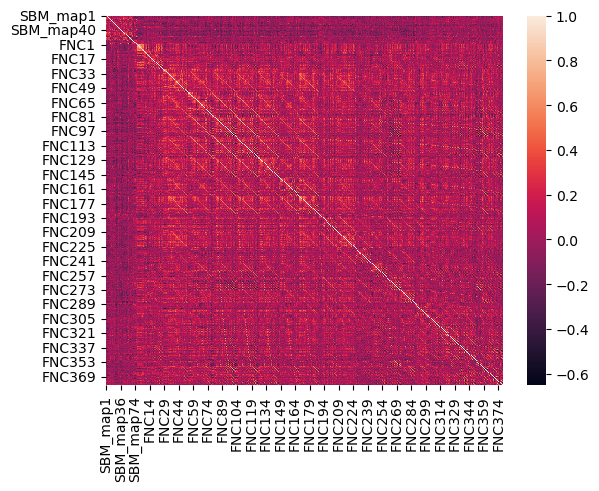

In [13]:
import seaborn as sns
corr_matrix = X.corr()
sns.heatmap(corr_matrix);
#No correlation

In [14]:
'''
#Scaling another method
#list for minmax
forminmax = X.columns.values.tolist()

# scale the goals from 0 to 1
X = minmax_scaling(X, columns=forminmax)

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', original_data.min(),'Maximum value:', original_data.max())
#print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', scaled_data.min(),'Maximum value:', scaled_data.max())
'''

"\n#Scaling another method\n#list for minmax\nforminmax = X.columns.values.tolist()\n\n# scale the goals from 0 to 1\nX = minmax_scaling(X, columns=forminmax)\n\nprint('Original data\nPreview:\n', original_data.head())\nprint('Minimum value:', original_data.min(),'Maximum value:', original_data.max())\n#print('_'*30)\n\nprint('\nScaled data\nPreview:\n', scaled_data.head())\nprint('Minimum value:', scaled_data.min(),'Maximum value:', scaled_data.max())\n"

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


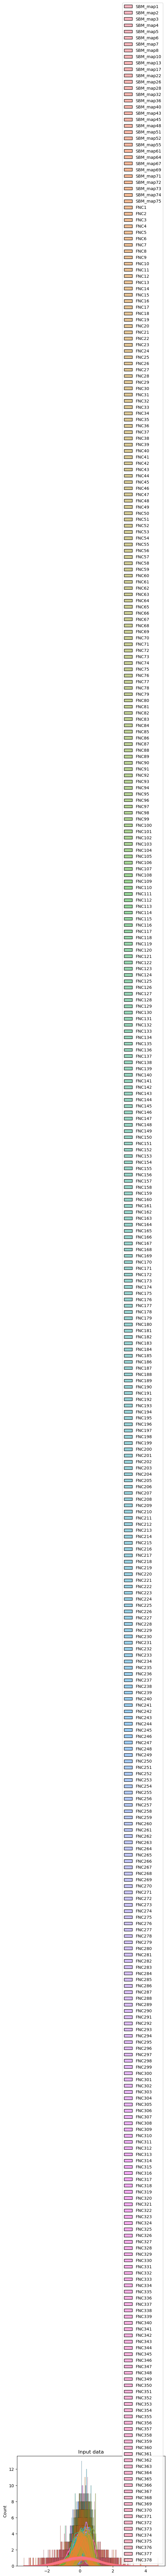

In [15]:
#normalization

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.histplot(X, kde=True)
ax.set_title("Input data")
plt.show()
#No need to normalize


In [16]:
#experiment with doubling data
X1 = X
X_concat = pd.concat([X, X1], join='outer', ignore_index=True)

y1 = y
y_concat = pd.concat([y, y], join='outer', ignore_index=True)

In [17]:
from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42) 

X_train, X_val, y_train, y_val = train_test_split(X_concat, y_concat, train_size=0.8, test_size=0.2, random_state=42) 

# the amount train data is very low. I doubled the train data and got 0.77768 public score.

In [18]:
#XGBoost

#Evaluation from competition
#fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions, pos_label=1)
#auc = metrics.auc(fpr,tpr)
import xgboost as xgb

params = {'objective' : 'binary:logistic',
          'eval_metric': 'auc',      
          'reg_alpha': 1, # L1 =1 on default
          'reg_lambda': 0, # L2 made worse
          'learning_rate': 0.05, # after GridSearchCV
          'max_depth': 2, # after GridSearchCV
          'n_estimators': 180 # after GridSearchCV
         }
clf = xgb.XGBClassifier(**params, tree_method="exact", booster="gbtree")
# X is the dataframe we created in previous snippet
clf.fit(X_train, y_train)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model.json")

In [19]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=180,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=0, ...)

In [20]:
y_pred = clf.predict_proba(X_val)[:,1]

#y_pred = clf.predict(X_val)

In [21]:
import sklearn.metrics as metrics
auc = metrics.roc_auc_score(y_val, y_pred)
print('AUC =', f'{auc:0.4f}')

AUC = 0.9932


In [22]:
#Test DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor


model_DTR = DecisionTreeRegressor(max_leaf_nodes=250, random_state=0)
model_DTR.fit(X_train, y_train)
preds_val_DTR = model_DTR.predict(X_val)
roc_auc_score_DTR = roc_auc_score(y_val, preds_val_DTR)
roc_auc_score_DTR

0.8571428571428572

In [23]:
#Test Linear egressor

from sklearn.linear_model import LinearRegression, LogisticRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
preds_val_LR = model_LR.predict(X_val)
roc_auc_score_LR = roc_auc_score(y_val, preds_val_LR)
roc_auc_score_LR


1.0

In [24]:
#Test Logistic egressor

model_LRN = LogisticRegression()
model_LRN.fit(X_train, y_train)
preds_val_LRN = model_LRN.predict(X_val)
roc_auc_score_LRN = roc_auc_score(y_val, preds_val_LRN)
roc_auc_score_LRN

0.9523809523809523

In [25]:
#Test DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier


model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)
preds_val_DTC = model_DTC.predict(X_val)
roc_auc_score_DTC = roc_auc_score(y_val, preds_val_DTC)
roc_auc_score_DTC

0.9047619047619048

In [26]:
#Test AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

model_ADA = AdaBoostClassifier()
model_ADA.fit(X_train, y_train)
preds_val_ADA = model_ADA.predict(X_val)
roc_auc_score_ADA = roc_auc_score(y_val, preds_val_ADA)
roc_auc_score_ADA

0.9523809523809523

In [27]:
#Test KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model_KNC = KNeighborsClassifier()
model_KNC.fit(X_train, y_train)
preds_val_KNC = model_KNC.predict(X_val)
roc_auc_score_KNC = roc_auc_score(y_val, preds_val_KNC)
roc_auc_score_KNC

0.7380952380952381

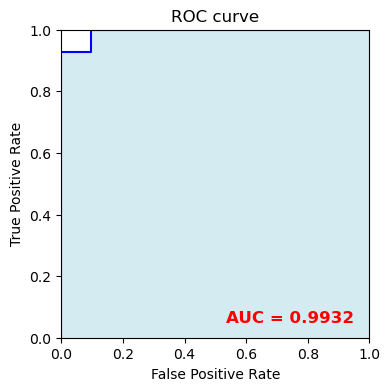

In [28]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)

plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.5)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#Optimize with grid search (find the best hyperparameters)
from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'model__n_estimators': [10, 100, 200], 'model__max_leaves': [2, 3, 5, 7, 10]
#}

#param_grid = {
#    'model__n_estimators': [10, 100, 200, 400], 'model__max_leaves': [2, 3, 5, 7, 10]
#}


param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc', return_train_score=True, verbose=True, n_jobs = 10)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.05, max_bin=256,
                                     max_cat_to_o...
                                     max_depth=2, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimator

In [30]:
grid_search.best_params_

#Result {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 180} - I'll use it

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [31]:
grid_search.best_score_

0.9743014128728413

In [32]:
clf_best_model = grid_search.best_estimator_.fit(X_train, y_train)

In [33]:
import sklearn.metrics as metrics

#y_pred = clf_best_model.predict_proba(X_val)[:,1]
y_pred = clf_best_model.predict_proba(X_val)[:,1]

auc = metrics.roc_auc_score(y_val, y_pred)
print('AUC =', f'{auc:0.4f}')

AUC = 1.0000


In [34]:
#Validation
# Imported train_SBM.csv
pred_SBM = pd.read_csv('test_SBM.csv')

# Imported train_FNC.csv
pred_FNC = pd.read_csv('test_FNC.csv')

#temp_df_val = pred_FNC.drop_duplicates(subset=['Id']) # Remove duplicates so lookup merge only returns first match
XVAL = pred_SBM.merge(pred_FNC, left_on=['Id'], right_on=['Id'], how='left', suffixes=['_pred_SBM', '_pred_FNC'])

XVAL.drop(['Id'], axis=1, inplace=True)

In [35]:
XVAL

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,1.154881,3.627246,0.146076,-0.677521,0.951169,0.482531,-2.404130,-0.715182,-0.475299,-0.896095,...,0.482131,0.022525,-0.034251,-0.103902,-0.497701,0.079286,0.265937,0.379066,-0.630483,-0.309032
1,-1.608977,-0.125656,2.232224,1.013575,1.227375,0.296077,-0.612468,-1.610222,-0.136698,0.039142,...,0.387964,0.288442,0.503947,-0.221215,-0.949426,0.340575,0.767685,0.417164,0.194081,-0.218685
2,1.611464,1.859449,-0.959714,-0.713587,0.826513,-0.405989,-0.752907,-0.484180,-1.212576,0.679237,...,-0.388256,0.052361,0.759901,0.478927,-0.164136,-0.096020,0.607880,0.099879,-0.429554,0.453645
3,-0.283111,-0.418010,1.962834,-0.342130,-0.939108,0.929705,1.041755,-1.073416,-0.815344,-1.945322,...,0.406804,0.169224,0.001855,0.324120,-0.212088,0.344033,0.234452,0.214809,-0.138947,0.436006
4,-0.688717,1.951002,1.512576,-0.854993,1.059652,-0.179238,-1.775324,0.649346,1.616116,0.985532,...,0.681542,0.306077,0.245725,0.222826,-0.492551,0.544921,0.665504,-0.261091,0.026635,0.341486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119743,-1.480245,1.812967,3.155527,1.485136,-1.172838,0.960593,-1.123315,-0.669877,-0.386190,1.230438,...,-0.459684,0.239929,0.597213,0.465530,0.282119,0.800191,-0.034895,0.727276,-0.189613,-0.217343
119744,1.413055,1.307057,-0.391332,-0.971637,0.127263,-0.065336,-1.270540,1.359392,0.502271,0.204747,...,0.573227,0.263226,0.250284,0.090320,0.089230,0.424621,0.537647,-0.263255,-0.565187,0.772172
119745,-2.534878,0.068401,0.097646,-1.930084,1.088774,-0.223778,-0.501659,-0.277775,0.095176,0.115329,...,0.370737,0.532247,0.552871,0.236706,0.328892,-0.682384,0.513252,0.542567,-0.249109,0.721351
119746,-1.473799,-0.005425,-0.418071,-0.742284,1.964021,4.535283,-1.248628,-1.480965,0.584118,-0.464323,...,-0.469113,0.126463,0.263478,0.419970,0.314430,0.362582,0.595930,0.728729,-0.220723,0.289331


In [36]:
# Missing values
missing_values_countXVAL = XVAL.isnull().sum()
total_cells = np.product(XVAL.shape)
total_missing = missing_values_countXVAL.sum()
percent_missingXVAL = (total_missing/total_cells) * 100
percent_missingXVAL

0.0

In [37]:
#Scaling for validation
'''
XVAL = (XVAL-XVAL.min())/(XVAL.max()-XVAL.min())
XVAL
#the score is 0.5:( Try L1 and L2 reg.
'''
'''
#Scaling another method
#list for minmax
forminmax = XVAL.columns.values.tolist()

# select the dataset
#XVAL = pd.DataFrame(XVAL)

# scale the goals from 0 to 1
XVAL = minmax_scaling(XVAL, columns=forminmax)
'''

'\n#Scaling another method\n#list for minmax\nforminmax = XVAL.columns.values.tolist()\n\n# select the dataset\n#XVAL = pd.DataFrame(XVAL)\n\n# scale the goals from 0 to 1\nXVAL = minmax_scaling(XVAL, columns=forminmax)\n'

In [38]:
XVAL

,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,...,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,1.154881,3.627246,0.146076,-0.677521,0.951169,0.482531,-2.404130,-0.715182,-0.475299,-0.896095,...,0.482131,0.022525,-0.034251,-0.103902,-0.497701,0.079286,0.265937,0.379066,-0.630483,-0.309032
1,-1.608977,-0.125656,2.232224,1.013575,1.227375,0.296077,-0.612468,-1.610222,-0.136698,0.039142,...,0.387964,0.288442,0.503947,-0.221215,-0.949426,0.340575,0.767685,0.417164,0.194081,-0.218685
2,1.611464,1.859449,-0.959714,-0.713587,0.826513,-0.405989,-0.752907,-0.484180,-1.212576,0.679237,...,-0.388256,0.052361,0.759901,0.478927,-0.164136,-0.096020,0.607880,0.099879,-0.429554,0.453645
3,-0.283111,-0.418010,1.962834,-0.342130,-0.939108,0.929705,1.041755,-1.073416,-0.815344,-1.945322,...,0.406804,0.169224,0.001855,0.324120,-0.212088,0.344033,0.234452,0.214809,-0.138947,0.436006
4,-0.688717,1.951002,1.512576,-0.854993,1.059652,-0.179238,-1.775324,0.649346,1.616116,0.985532,...,0.681542,0.306077,0.245725,0.222826,-0.492551,0.544921,0.665504,-0.261091,0.026635,0.341486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119743,-1.480245,1.812967,3.155527,1.485136,-1.172838,0.960593,-1.123315,-0.669877,-0.386190,1.230438,...,-0.459684,0.239929,0.597213,0.465530,0.282119,0.800191,-0.034895,0.727276,-0.189613,-0.217343
119744,1.413055,1.307057,-0.391332,-0.971637,0.127263,-0.065336,-1.270540,1.359392,0.502271,0.204747,...,0.573227,0.263226,0.250284,0.090320,0.089230,0.424621,0.537647,-0.263255,-0.565187,0.772172
119745,-2.534878,0.068401,0.097646,-1.930084,1.088774,-0.223778,-0.501659,-0.277775,0.095176,0.115329,...,0.370737,0.532247,0.552871,0.236706,0.328892,-0.682384,0.513252,0.542567,-0.249109,0.721351
119746,-1.473799,-0.005425,-0.418071,-0.742284,1.964021,4.535283,-1.248628,-1.480965,0.584118,-0.464323,...,-0.469113,0.126463,0.263478,0.419970,0.314430,0.362582,0.595930,0.728729,-0.220723,0.289331


In [39]:
test_preds = clf_best_model.predict_proba(XVAL)[:,1]

#test_preds = clf.predict_proba(XVAL)[:,1] # use for probabilty, better result.Use it and grid_search.

#test_preds = clf.predict(XVAL) # use for 0/1

In [40]:
output = pd.DataFrame({'Id': pred_SBM.Id,'Probability': test_preds})
output.to_csv('submission.csv', index=False)

In [41]:
output

,Id,Probability
0,100004,0.618324
1,100015,0.125601
2,100026,0.715165
3,100030,0.210075
4,100047,0.401771
...,...,...
119743,999956,0.584844
119744,999979,0.855506
119745,999989,0.346668
119746,999992,0.625741


In [42]:
'''
# Experiment with adding test data to train:
test_preds_eval = clf.predict(XVAL)

# Experiment with adding test data to train:
test_preds_eval = pd.DataFrame(test_preds_eval)

# Experiment with adding test data to train:
params = {'objective' : 'binary:logistic',
          'eval_metric': 'auc',      
          'reg_alpha': 1, # L1 =1 on default
          'reg_lambda': 0, # L2 made worse
          'learning_rate': 0.05, # after GridSearchCV
          'max_depth': 2, # after GridSearchCV
          'n_estimators': 180 # after GridSearchCV
         }
clf_eval = xgb.XGBClassifier(**params, tree_method="exact", booster="gbtree")
# X is the dataframe we created in previous snippet
clf_eval.fit(XVAL, test_preds_eval)

test_preds_eval_result = clf_eval.predict_proba(XVAL)[:,1]

output = pd.DataFrame({'Id': pred_SBM.Id,'Probability': test_preds_eval_result})
output.to_csv('submission.csv', index=False)

'''

'\n# Experiment with adding test data to train:\ntest_preds_eval = clf.predict(XVAL)\n\n# Experiment with adding test data to train:\ntest_preds_eval = pd.DataFrame(test_preds_eval)\n\n# Experiment with adding test data to train:\nparams = {\'objective\' : \'binary:logistic\',\n          \'eval_metric\': \'auc\',      \n          \'reg_alpha\': 1, # L1 =1 on default\n          \'reg_lambda\': 0, # L2 made worse\n          \'learning_rate\': 0.05, # after GridSearchCV\n          \'max_depth\': 2, # after GridSearchCV\n          \'n_estimators\': 180 # after GridSearchCV\n         }\nclf_eval = xgb.XGBClassifier(**params, tree_method="exact", booster="gbtree")\n# X is the dataframe we created in previous snippet\nclf_eval.fit(XVAL, test_preds_eval)\n\ntest_preds_eval_result = clf_eval.predict_proba(XVAL)[:,1]\n\noutput = pd.DataFrame({\'Id\': pred_SBM.Id,\'Probability\': test_preds_eval_result})\noutput.to_csv(\'submission.csv\', index=False)\n\n'